<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="B nazanin" size=4>
    <b style="font-size: 35px">clustering</b><br>
</font></div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
In this question, we intend to implement two algorithms, kmeans and GMM. To implement these two algorithms, we do not use Python-ready libraries in which these two algorithms are implemented. We will use this implementation to solve the following questions.

The kmeans algorithm continues until the center of the clusters does not change, and the GMM continues until the difference between two consecutive likelihood logarithms is less than 0.1, and we consider the original GMM centers to be the centers obtained after the implementation of the kmeans algorithm.
</font>
</div>

In [ ]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [ ]:
def printer(X, Y, centrd=[245, 321]):
    K_meanz, centroidz = K_means(X, Y, 2, centrd)
    prediction, means = GMM(Y, X, 2, centroidz, K_meanz)
    gmm_pr = np.argmax(prediction, axis=1)
    print(purity(Y, K_meanz))
    print(rand_index(Y, K_meanz))
    print(purity(Y, gmm_pr))
    print(rand_index(Y, gmm_pr))
    return (K_meanz, means, centroidz, gmm_pr)

In [ ]:
def plot(X, K_means_clusetr, means, centroids, gmm_pred, cluster_num=2 ):
    draw(X, K_means_clusetr, means, centroids)
    draw(X, gmm_pred, means, centroids)

In [ ]:
def draw(X, func, means, centroids, cluster_num=2 ):
    color=['green','blue']
    for k in range(num_of_clusters):
        cluster = func == k
        plt.scatter(X[cluster, 0],X[cluster, 1],c=color[k])
    plt.scatter(centroids[:, 0],centroids[:, 1],s=300,c='black')
    plt.show()

In [ ]:
def GMM(Y, X, cluseter_num, centroid, k_means_cluster, step_num= 500, threshold= 0.1, eta= 1e-14):
    cov, lkly_hd, gamma, pi, means = GMM_init(cluseter_num, X, centroid)

    for cl_num in range(cluseter_num):
        tmp_mean = X[k_means_cluster == cl_num] - centroid[cl_num]
        makhraj = X[k_means_cluster == cl_num].shape[0]
        sorat = np.dot(pi[cl_num] * tmp_mean.T, tmp_mean)
        cov[cl_num,:, :] = sorat / makhraj

    prev_gam = gamma
    for step in range(step_num):
        for i in range(cluseter_num):
            distr = multivariate_normal(means[i], cov[i])
            lkly_hd[:,i] = distr.pdf(X)
        gamma = pi * lkly_hd / np.sum(pi * lkly_hd, axis=1)[:, None]
        
        if (np.all(np.abs(np.log(prev_gam+eta) - np.log(gamma+eta)) < threshold)):
            break
        prev_gam = gamma
        pi = np.mean(gamma, axis = 0)
        means = np.dot(gamma.T, X) / np.sum(gamma, axis = 0)[:,None]

        for i in range(cluseter_num):
            tmp_x = X - means[i, :]
            tmpr_gamma = np.diag(gamma[:,i])
            sorat = (np.dot(np.dot(tmp_x.T, tmpr_gamma), tmp_x))
            makhraj =  np.sum(gamma, axis = 0)[:, None][i]
            cov[i,:,:]= sorat / makhraj
            
    pred = np.zeros((X.shape[0], cluseter_num))
    for i in range(cluseter_num):
        pred[:,i] = pi[i] * multivariate_normal.pdf(X, means[i,:], cov[i])
        
    return pred, means

def GMM_init(cluseter_num, X, centroid):
    return np.zeros((cluseter_num, X.shape[1], X.shape[1])), np.zeros((X.shape[0] , cluseter_num)), np.zeros((X.shape[0] , cluseter_num)), [0.5, 0.5], centroid

def K_means_init(X, cluseter_num):
    tmp = np.random.choice(X.shape[0], cluseter_num)
    return tmp, X[tmp], X[tmp]

def K_means(X, Y, cluseter_num, bullz= 1):
    x_centroids = np.random.choice(X.shape[0], cluseter_num)
    centroids = X[x_centroids]
    centroids_prev = centroids
    
    while True:
        distance = np.array([]).reshape(X.shape[0], 0)
        for i in range(cluseter_num):
            dist = np.sqrt(np.sum((X-centroids[i])**2,axis=1))
            distance = np.c_[distance, dist]
        tmpor = np.argmin(distance,axis=1)
        clusters_km = tmpor
        for i in range(cluseter_num):
            cluster = tmpor == i
            centroids[i] = np.mean(X[cluster],axis=0)
        if np.all(centroids == centroids_prev):
            break
    return clusters_km, centroids

In [ ]:
def purity(y_true, y_pred):
    true_clusters = np.unique(y_true)
    pred_clusters = np.unique(y_pred)
    tp = []
    for i in pred_clusters:
        temp = 0
        for j in true_clusters:
            temp = np.sum(y_true[y_pred == i] == j) if temp < np.sum(y_true[y_pred == i] == j) else temp            
        tp.append(temp)
    return np.sum(np.array(tp))/ y_true.shape[0]

def rand_index(y_true, y_pred):
    tp_plus_fp = ((np.bincount(y_pred)) * (np.bincount(y_pred) - 1) / 2).sum()
    tp_plus_fn = ((np.bincount(y_true)) * (np.bincount(y_true) - 1) / 2).sum()
    A = np.c_[(y_pred, y_true)]
    tp = sum(((np.bincount(y_true[y_pred == i]) * (np.bincount(y_true[y_pred == i]) - 1)) / 2).sum() for i in set(y_pred))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = ((len(A))*(len(A) - 1) / 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

<div style="direction:rtl;line-height:200%;">
    <font face="XB Zar" size=3>
a:
Using the following function, we create the database, then run two algorithms on the database with k = 2. In the k-means method, it is better to run the algorithm several times with different starting modes and select the best result.
    </font>
</div>

In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


<div style="direction:rtl;line-height:200%;">
    <font face="XB Zar" size=3>
B:
        We obtain the quality of the implemented clustering algorithms using Purity and Index-Rand methods and compare them.
    </font>
</div>

<div style="direction:rtl;line-height:200%;">
    <font face="XB Zar" size=3>
C:
        Using the following commands, we create new datasets and run two algorithms on them, and after visualization using Python-ready libraries, we compare the clustering results.

 We take the number of clusters equal to 2.    </font>
</div>

In [ ]:
from sklearn.datasets.samples_generator import make_classification
X,Y = make_classification(n_samples=700, n_features=10,
                           n_informative=5, n_redundant=0,
                           n_clusters_per_class=2, n_classes=3)


_, _, _, _ = printer(X, Y)

0.5285714285714286
0.5728142244022072
0.5485714285714286
0.5818434498262824


0.5314285714285715
0.5012630288166768
0.5742857142857143
0.510337216431637


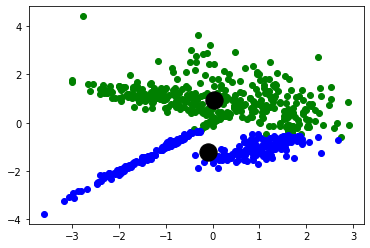

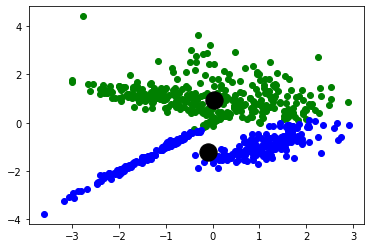

In [ ]:
from sklearn.datasets.samples_generator import make_classification
X, Y = make_classification(n_samples=700, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2)

K_meanz, means, centroidz, gmm_pr = printer(X, Y)
plot(X, K_means_clusetr= K_meanz,means=means, centroids= centroidz, gmm_pred= gmm_pr)

0.7142857142857143
0.5912528101369303
0.8385714285714285
0.7288739014919272


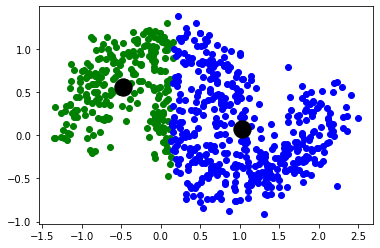

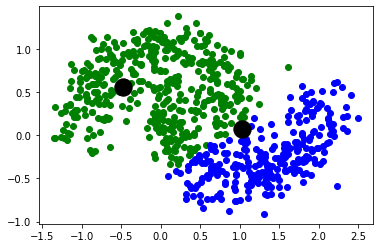

In [ ]:
from sklearn.datasets.samples_generator import make_moons
X, Y = make_moons(n_samples=700, noise=0.2)

K_meanz, means, centroidz, gmm_pr = printer(X, Y)
plot(X, K_means_clusetr= K_meanz,means=means, centroids= centroidz, gmm_pred= gmm_pr)

0.5085714285714286
0.4994318414060903
0.5085714285714286
0.4994318414060903


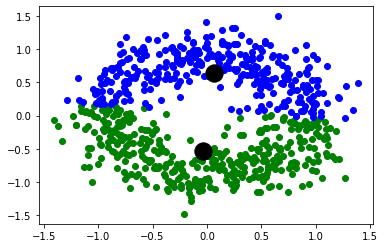

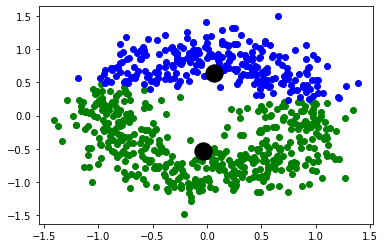

In [ ]:
from sklearn.datasets.samples_generator import make_circles
X, Y = make_circles(n_samples=700, noise=0.2)

num_of_clusters = 2
K_meanz, means, centroidz, gmm_pr = printer(X, Y)
plot(X, K_means_clusetr= K_meanz,means=means, centroids= centroidz, gmm_pred= gmm_pr)